In [92]:
from src import modules
import MDAnalysis as mda
from tqdm.notebook import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams.update({'font.size': 16})

In [93]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [135]:
colours = {"DOPC": "blue",
           "POPC": "purple",
           "POPE": "orange"}

In [148]:
out_dir = "Figures/Plots/"

# DOPC & POPC

In [136]:
results = "example_results/"

DOPC_POPC_10 = results + "DOPC_POPC_10.csv"

DOPC_POPC_20 = results + "DOPC_POPC_20.csv"

DOPC_POPC_30 = results + "DOPC_POPC_30.csv"

POPC_POPE_10 = results + "POPC_POPE_10.csv"

POPC_POPE_20 = results + "POPC_POPE_20.csv"

POPC_POPE_30 = results + "POPC_POPE_30.csv"

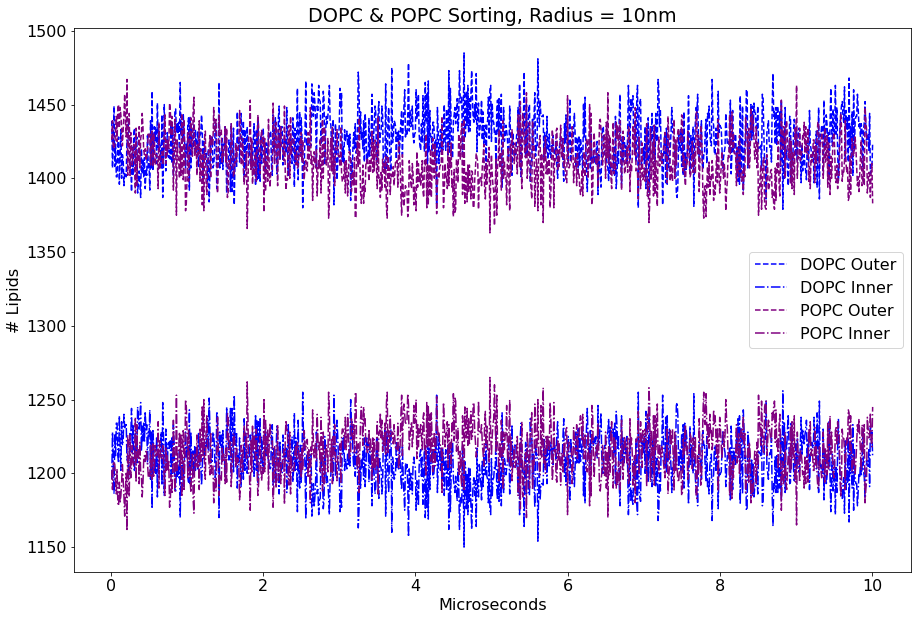

In [153]:
modules.csv_to_plot(DOPC_POPC_10, ["DOPC", "POPC"], rolling=1, \
                    title="DOPC & POPC Sorting, Radius = 10nm", colours=colours, index_scaling=100, \
                    x_label = "Microseconds", out=out_dir + "DOPC_POPC_r10.png")

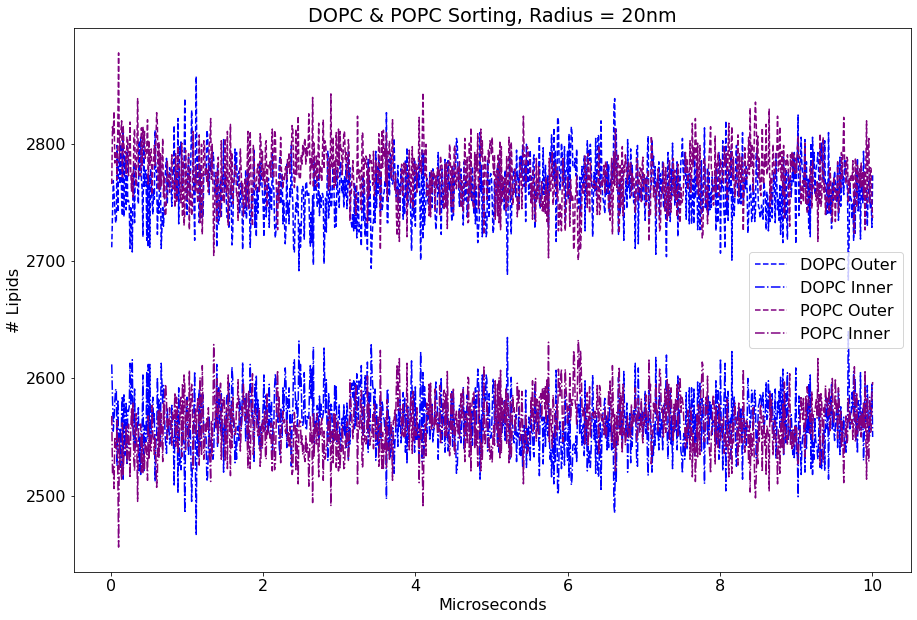

In [154]:
modules.csv_to_plot(DOPC_POPC_20, ["DOPC", "POPC"], rolling=1, title="DOPC & POPC Sorting, Radius = 20nm", colours=colours, index_scaling=100, x_label = "Microseconds", out=out_dir + "DOPC_POPC_r20.png")

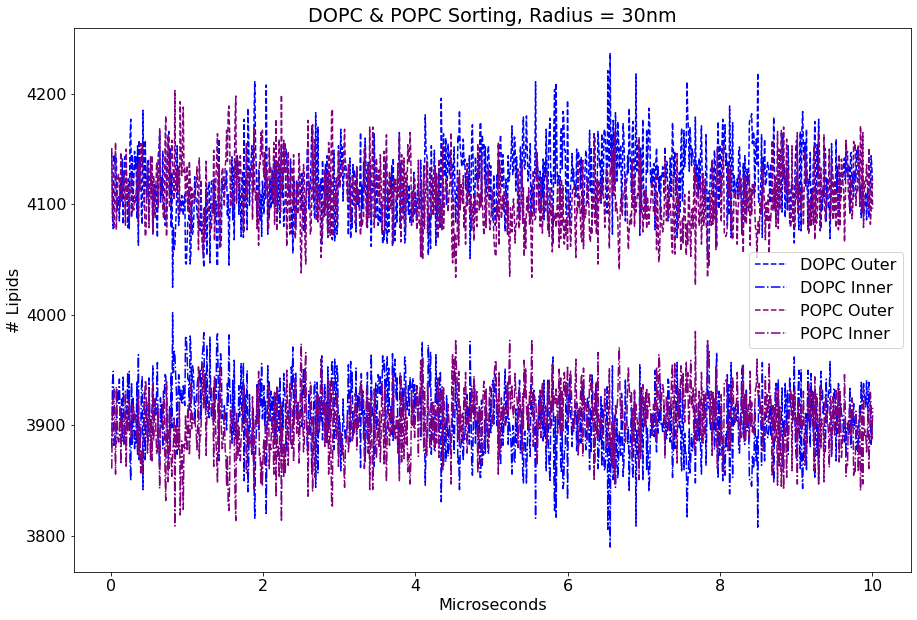

In [155]:
modules.csv_to_plot(DOPC_POPC_30, ["DOPC", "POPC"], title="DOPC & POPC Sorting, Radius = 30nm", colours=colours, index_scaling=100, x_label = "Microseconds", out=out_dir + "DOPC_POPC_r30.png")

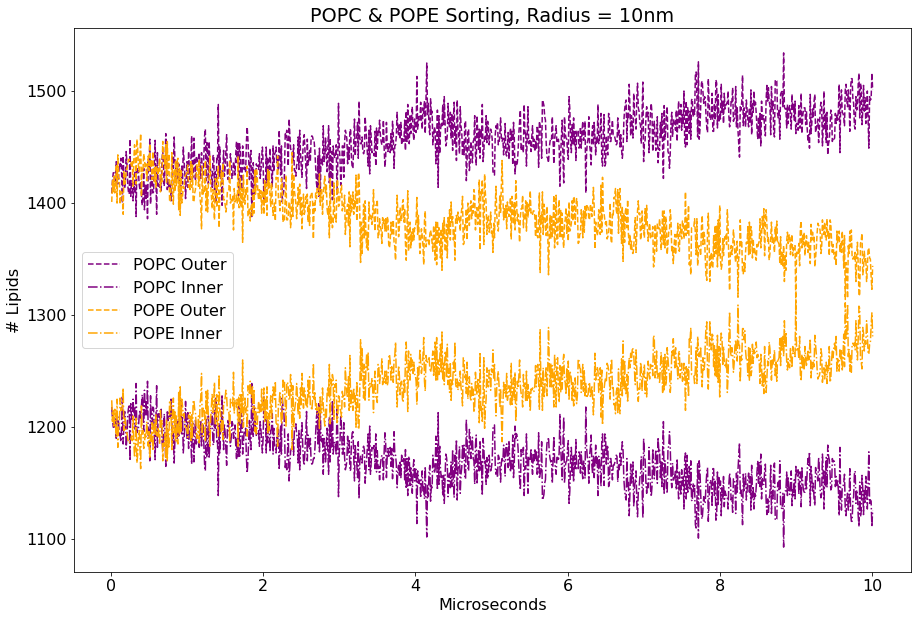

In [156]:
modules.csv_to_plot(POPC_POPE_10, ["POPC", "POPE"], title="POPC & POPE Sorting, Radius = 10nm", rolling=1, colours=colours, index_scaling=100, x_label = "Microseconds", out=out_dir + "POPC_POPE_r10.png")

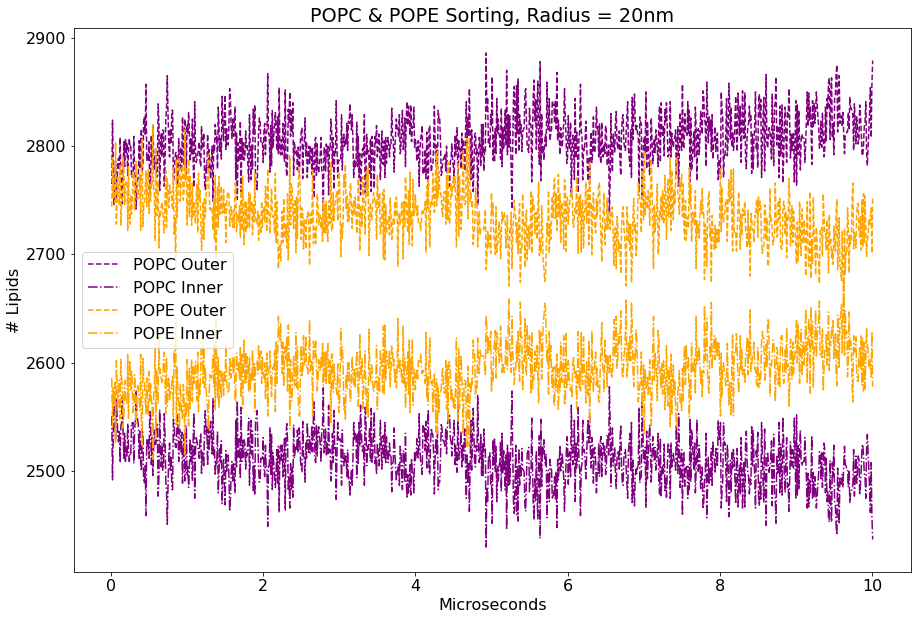

In [157]:
modules.csv_to_plot(POPC_POPE_20, ["POPC", "POPE"], title="POPC & POPE Sorting, Radius = 20nm", rolling=1, colours=colours, index_scaling=100, x_label = "Microseconds", out=out_dir + "POPC_POPE_r20.png")

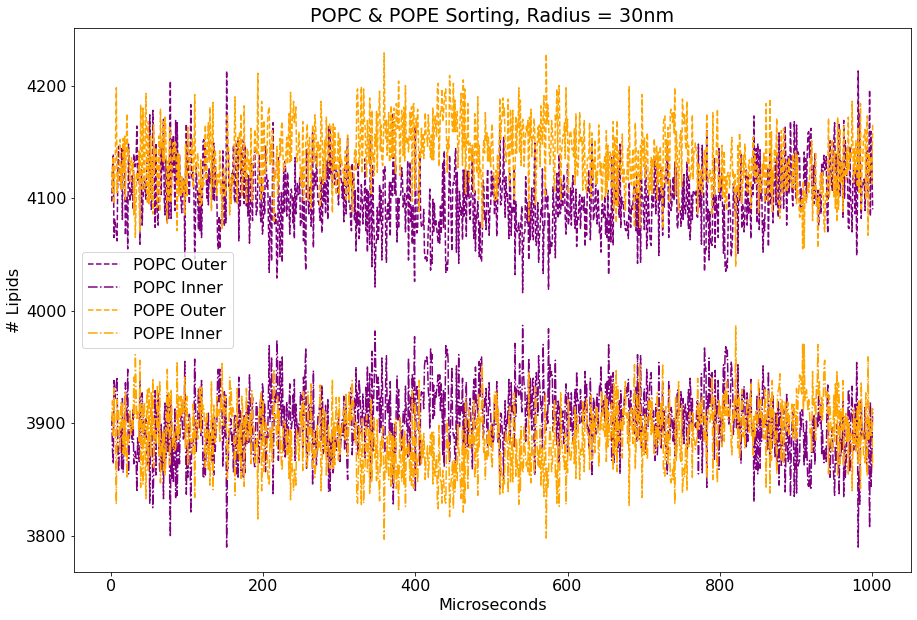

In [158]:
modules.csv_to_plot(POPC_POPE_30, ["POPC", "POPE"], title="POPC & POPE Sorting, Radius = 30nm", rolling=1, colours=colours, x_label = "Microseconds", out=out_dir + "POPC_POPE_r30.png")